In [1]:
from play_by_play import load_specific_games, load_seasons, get_lineup_results, get_lineup_feature
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 81
pd.options.display.max_rows = 150
pd.options.display.max_colwidth = 100

In [3]:
df, players_dict = load_seasons(seasons=[2016], lineups=True, possessions=True, drop_lineup_miscount_games=True)

/boxscores/201510270ATL.html, Loading schrode01... Loading korveky01... Loading splitti01... Loading horfoal01... Loading pattela01... Loading baynear01... Loading muscami01... Loading teaguje01... Loading jacksre01... Loading morrima03... Loading meeksjo01... Loading scottmi01... Loading ilyaser01... Loading millspa01... Loading bazemke01... Loading blakest01... Loading caldwke01... Loading drumman01... Loading sefolth01... Loading johnsst04... /boxscores/201510270CHI.html, Loading mozgoti01... Loading varejan01... Loading snellto01... Loading jefferi01... Loading smithjr01... Loading butleji01... Loading brookaa01... Loading cunnija01... Loading mirotni01... Loading gasolpa01... Loading noahjo01... Loading dellama01... Loading mcderdo01... Loading mooreet01... Loading jamesle01... Loading rosede01... Loading jonesja02... Loading loveke01... Loading gibsota01... Loading willima01... Loading thomptr01... /boxscores/201510270GSW.html, Loading bogutan01... Loading davisan02... Loading li

In [18]:
df.head()


,URL,GameType,Location,Date,Season,WinningTeam,Quarter,SecLeft,Timestamp,SecElapsed,AwayTeam,AwayPlay,AwayPossEnd,AwayPoss,AwayPts,AwayScore,HomeTeam,HomePlay,HomePossEnd,HomePoss,HomePts,HomeScore,Margin,ClosestRemainingMargin,FinalMargin,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,AwayLineup,HomeLineup
0,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,720,1,0.0,DET,Jump ball: A. Drummond vs. A. Horford (E. lyasova gains possession),False,0,0,0,ATL,NaN,False,0,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,drumman01,horfoal01,ilyaser01,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
1,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,701,2,19.0,DET,A. Drummond misses 2-pt layup from 1 ft (block by A. Horford),False,0,0,0,ATL,NaN,False,0,0,0,0,0,-12,drumman01,2-pt layup,miss,1.0,NaN,horfoal01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
2,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,699,3,2.0,DET,NaN,True,1,0,0,ATL,Defensive rebound by K. Bazemore,False,0,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bazemke01,defensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
3,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,697,4,2.0,DET,NaN,False,1,0,0,ATL,Turnover by K. Bazemore (bad pass),True,1,0,0,0,0,-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bazemke01,bad pass,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"
4,/boxscores/201510270ATL.html,regular,Philips Arena Atlanta Georgia,2015-10-27 20:00:00,2015-16,DET,1,681,5,16.0,DET,M. Morris makes 2-pt jump shot from 13 ft (assist by A. Drummond),True,2,2,2,ATL,NaN,False,1,0,0,-2,0,-12,morrima03,2-pt jump shot,make,13.0,drumman01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01","teaguje01,bazemke01,korveky01,millspa01,horfoal01"


In [9]:
df.value_counts(['URL'])

URL                         
/boxscores/201512180CHI.html    695
/boxscores/201510300ORL.html    634
/boxscores/201512110BOS.html    607
/boxscores/201601250SAC.html    587
/boxscores/201602200ATL.html    582
                               ... 
/boxscores/201604170SAS.html    382
/boxscores/201604050MIL.html    380
/boxscores/201512260ORL.html    379
/boxscores/201603200MIL.html    378
/boxscores/201603260MIL.html    377
Length: 1311, dtype: int64

In [4]:
df_lineups, df_matchups = get_lineup_results(df, return_lineup_matchups=False), get_lineup_results(df, return_lineup_matchups=True)
df_matchups.head()

,Season,AwayLineup,HomeLineup,SecElapsed,AwayPossEnd,HomePossEnd,AwayPts,HomePts,HomePPP,AwayPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist
0,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01","parketo01,greenda02,leonaka01,aldrila01,duncati01",2851.0,93,90,90,96,1.066667,0.967742,183,0.000750,0.000718
1,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01","curryst01,thompkl01,greendr01,barneha02,bogutan01",2471.0,84,82,89,76,0.926829,1.059524,166,0.001399,0.001370
2,2015-16,"parketo01,greenda02,leonaka01,aldrila01,duncati01","westbru01,roberan03,ibakase01,duranke01,adamsst01",2531.0,79,76,91,75,0.986842,1.151899,155,0.002064,0.001978
3,2015-16,"jacksre01,caldwke01,morrima03,harrito02,drumman01","irvinky01,smithjr01,loveke01,jamesle01,thomptr01",2570.0,76,75,94,89,1.186667,1.236842,151,0.002740,0.002571
4,2015-16,"dragigo01,wadedw01,johnsjo02,denglu01,whiteha01","walkeke02,leeco01,willima02,jeffeal01,kaminfr01",2241.0,70,68,68,66,0.970588,0.971429,138,0.003329,0.003113


In [8]:
df_lineups.head()

,Season,Lineup,SecElapsed,Home,OffPoss,DefPoss,PtsScored,PtsAllowed,OffPPP,DefPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist
0,2015-16,"teaguje01,bazemke01,korveky01,millspa01,horfoal01",32029.0,False,1088,1085,1154,1137,1.060662,1.047926,2173,0.004210,0.004265
1,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",33182.0,True,1079,1082,1276,1052,1.182576,0.972274,2161,0.008572,0.008507
2,2015-16,"westbru01,roberan03,ibakase01,duranke01,adamsst01",32342.0,False,1046,1050,1185,1092,1.132887,1.040000,2096,0.012823,0.012621
3,2015-16,"teaguje01,bazemke01,korveky01,millspa01,horfoal01",28959.0,True,983,966,1032,951,1.049847,0.984472,1949,0.016629,0.016446
4,2015-16,"jacksre01,caldwke01,morrima03,ilyaser01,drumman01",27889.0,False,902,890,930,937,1.031042,1.052809,1792,0.020295,0.019963


In [ ]:
#df_matchups = pd.read_csv('PBP_data/NBA_PBP_parsed_matchups.csv', index_col=0)
#df_lineups = pd.read_csv('PBP_data/NBA_PBP_lineups.csv', index_col=0)

In [ ]:
#big_df = pd.read_csv('PBP_data/big_df_sample_features.csv', index_col=0)
#big_df.columns


In [ ]:
sample_table_cols = [('info',('Height_cm', 'Mass_kg', 'age', 'salary')),
              ('advanced',('USG%','WS/48','OBPM','DBPM','BPM','VORP')),
              ('per_poss',('3PA', '3P%', '2PA', '2P%', 'FT', 'FTA','FT%', 'ORB', 
                           'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                           'ORtg', 'DRtg')),
             ]

In [10]:
table_cols = [('info',('Height_cm', 'Mass_kg', 'age', 'salary')),
              ('advanced',('USG%','OBPM','DBPM','VORP')),
              ('per_poss',('PTS','ORtg', 'DRtg')),
             ]

big_lineup_df = df_lineups.iloc[:,:]
big_matchup_df = df_matchups.iloc[:,:]
for t, cols in table_cols:
    for col in cols:
        print(t, col)
        
        big_lineup_df = get_lineup_feature(big_lineup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='list',
                                   delta_AwayHome=False)
        big_matchup_df = get_lineup_feature(big_matchup_df, table_name=t,
                                   col_name=col,
                                   seasons_ago=0,
                                   agg='list',
                                   delta_AwayHome=True)
      
        

info Height_cm
info Mass_kg
info age
info salary
advanced USG%
advanced OBPM
advanced DBPM


IOStream.flush timed out


advanced VORP
per_poss PTS
per_poss ORtg
per_poss DRtg


In [11]:
big_matchup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36623 entries, 0 to 36622
Data columns (total 68 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             36623 non-null  object 
 1   AwayLineup         36623 non-null  object 
 2   HomeLineup         36623 non-null  object 
 3   SecElapsed         36623 non-null  float64
 4   AwayPossEnd        36623 non-null  int64  
 5   HomePossEnd        36623 non-null  int64  
 6   AwayPts            36623 non-null  int64  
 7   HomePts            36623 non-null  int64  
 8   HomePPP            34254 non-null  float64
 9   AwayPPP            34365 non-null  float64
 10  TotalPossessions   36623 non-null  int64  
 11  SecElapsedCumDist  36623 non-null  float64
 12  TotPossCumDist     36623 non-null  float64
 13  delta1_cm          36623 non-null  int64  
 14  delta2_cm          36623 non-null  int64  
 15  delta3_cm          36623 non-null  int64  
 16  delta4_cm          366

In [112]:
big_lineup_filtered = big_lineup_df[big_lineup_df['TotalPossessions'] > 20].copy()

In [ ]:


big_df.head()

In [19]:
def melt_df(df, id_cols, col_substr):
    get_substr_cols = lambda x:[col for col in df.columns if x in col]

    new_df = df[id_cols+get_substr_cols(col_substr)].melt(id_vars=id_cols).copy()
    return new_df


In [113]:
new_df = melt_df(big_lineup_filtered, id_cols=['Season', 'Lineup', 'Home','TotalPossessions'], col_substr='OBPM')

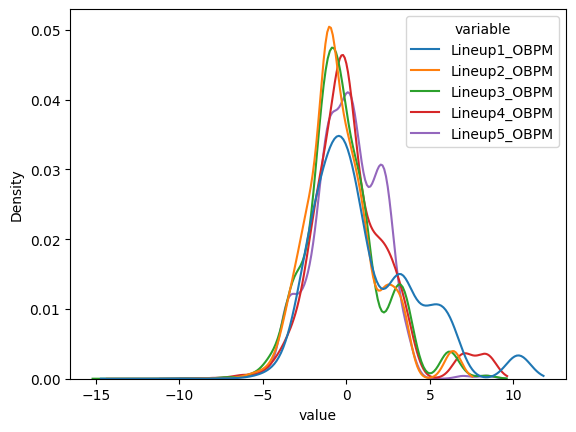

In [114]:
sns.kdeplot(data=new_df, 
            x='value', 
            #y='value',
            hue='variable',
            weights='TotalPossessions',
           bw_adjust=1)
plt.show()

In [ ]:
#new_df['rel_weight'] = new_df['TotalPossessions'] / new_df['TotalPossessions'].sum()

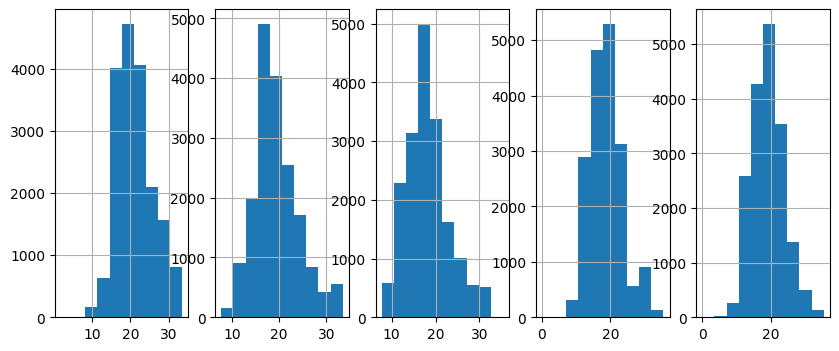

In [50]:
fig, ax = plt.subplots(1,5, figsize=(10,4))
for n in range(5):
    big_lineup_df[f'Lineup{n+1}_USG%'].hist(ax=ax[n])

In [ ]:
sns.violinplot(data=new_df, 
            x='variable', 
            y='value')
plt.show()

In [ ]:
big_df.to_csv('PBP_data/big_df_sample_features.csv', header=True, index=True)




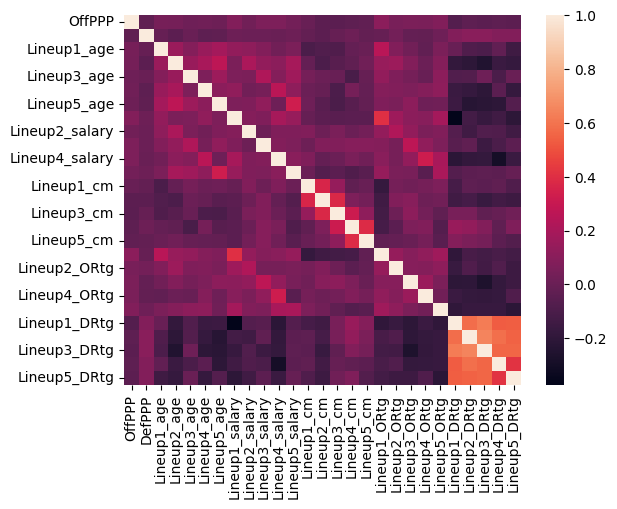

In [116]:

def heatmap_column_subsets(df, col_substrs):
    cols_to_plot=[]
    for substr in col_substrs:
        cols_to_plot = cols_to_plot + [col for col in df.columns if substr in col]

    sns.heatmap(df[cols_to_plot].corr(numeric_only=True))
    plt.show()
    
heatmap_column_subsets(big_lineup_filtered, ['PPP', 'age', 'salary', 'cm', 'Rtg'])

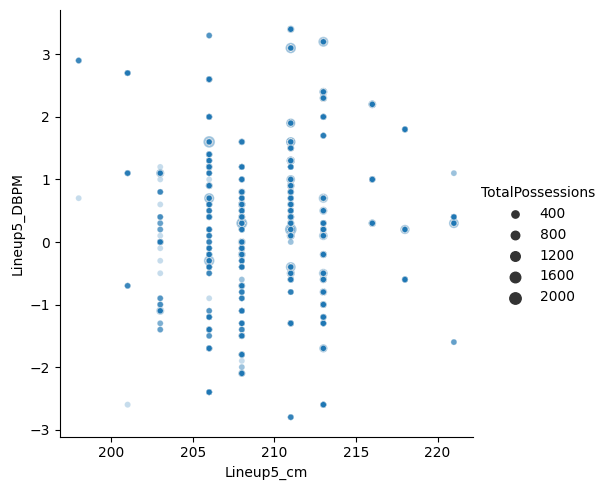

In [103]:
sns.relplot(data=big_lineup_df[big_lineup_df['TotalPossessions'] > 20], x='Lineup5_cm', y='Lineup5_DBPM', size='TotalPossessions', alpha=0.25)
plt.show()

In [89]:
big_lineup_df[(3 < big_lineup_df['OffPPP']) & (big_lineup_df['OffPPP'] < 50)]#.sort_values('OffPPP', ascending=False).head(60)

,Season,Lineup,SecElapsed,Home,OffPoss,DefPoss,PtsScored,PtsAllowed,OffPPP,DefPPP,TotalPossessions,SecElapsedCumDist,TotPossCumDist,Lineup1_cm,Lineup2_cm,Lineup3_cm,Lineup4_cm,Lineup5_cm,Lineup1_kg,Lineup2_kg,Lineup3_kg,Lineup4_kg,Lineup5_kg,Lineup1_age,Lineup2_age,Lineup3_age,Lineup4_age,Lineup5_age,Lineup1_salary,Lineup2_salary,Lineup3_salary,Lineup4_salary,Lineup5_salary,Lineup1_USG%,Lineup2_USG%,Lineup3_USG%,Lineup4_USG%,Lineup5_USG%,Lineup1_OBPM,Lineup2_OBPM,Lineup3_OBPM,Lineup4_OBPM,Lineup5_OBPM,Lineup1_DBPM,Lineup2_DBPM,Lineup3_DBPM,Lineup4_DBPM,Lineup5_DBPM,Lineup1_VORP,Lineup2_VORP,Lineup3_VORP,Lineup4_VORP,Lineup5_VORP,Lineup1_PTS,Lineup2_PTS,Lineup3_PTS,Lineup4_PTS,Lineup5_PTS,Lineup1_ORtg,Lineup2_ORtg,Lineup3_ORtg,Lineup4_ORtg,Lineup5_ORtg,Lineup1_DRtg,Lineup2_DRtg,Lineup3_DRtg,Lineup4_DRtg,Lineup5_DRtg
13337,2015-16,"curryst01,barbole01,rushbr01,greendr01,bogutan01",101.0,False,2,3,7,7,3.5,2.333333,5,0.974527,0.973308,188,190,198,198,213,83,87,99,104,117,27.80,33.09,30.49,25.83,31.09,11370786,2500000,1270964,14300000,12000000,32.6,18.1,12.5,18.8,11.4,10.3,-1.9,-0.6,2.6,-0.9,1.6,-0.1,-0.2,2.9,3.2,9.5,0.0,0.3,5.3,1.6,42.5,19.4,14.0,19.5,12.5,125.0,106.0,108.0,115.0,120.0,103.0,106.0,106.0,100.0,99.0
13953,2015-16,"gallola01,afflaar01,thomala01,lopezro01,porzikr01",61.0,False,2,3,7,4,3.5,1.333333,5,0.980824,0.979354,185,196,203,213,221,90,95,108,127,108,24.06,30.21,27.69,27.75,20.42,845059,8000000,1650000,13000000,4131720,15.6,17.9,16.9,17.7,24.6,-1.7,-1.3,-1.7,0.4,0.6,0.7,-1.6,-1.5,-0.5,0.3,0.5,-0.5,-0.4,1.0,1.5,15.8,19.7,18.9,19.5,25.8,105.0,105.0,107.0,113.0,103.0,108.0,112.0,112.0,107.0,103.0
14298,2015-16,"rubiori01,muhamsh01,martike02,paynead01,townska01",83.0,False,2,2,7,3,3.5,1.500000,4,0.983504,0.982571,188,198,201,208,211,86,101,90,107,112,25.20,23.13,32.92,24.87,20.13,12365000,2056920,7085000,1938840,5703600,17.7,22.8,22.6,17.7,24.9,1.0,0.6,-1.6,-6.1,2.5,0.8,-3.1,-1.6,-0.2,-0.4,2.3,-0.2,-0.4,-0.5,2.7,16.6,25.9,23.7,13.7,28.8,110.0,110.0,103.0,81.0,112.0,107.0,114.0,111.0,108.0,106.0
14724,2015-16,"burksal01,haywago01,hoodro01,inglejo01,booketr01",55.0,False,2,2,7,2,3.5,1.000000,4,0.987283,0.985915,198,201,203,203,203,97,102,94,99,103,24.45,25.78,23.20,28.25,28.10,9213484,15409570,1348440,2250000,4775000,25.9,25.7,21.5,13.5,14.6,0.2,2.4,0.7,-1.4,-1.0,-0.6,0.2,0.0,1.6,1.0,0.3,3.3,1.7,0.7,0.8,27.3,28.8,23.9,14.5,15.0,104.0,110.0,109.0,105.0,109.0,107.0,105.0,107.0,105.0,102.0
15131,2015-16,"russeda01,clarkjo01,artesro01,randlju01,sacrero01",84.0,False,1,2,5,4,5.0,2.000000,3,0.989542,0.989073,193,193,201,203,213,87,87,117,113,122,19.86,23.57,36.13,21.09,26.57,5103120,845059,1499187,3132240,981348,24.1,22.8,16.2,21.2,14.3,-0.7,-0.1,-3.2,-1.9,-3.3,-1.6,-1.5,-0.3,-1.3,-1.3,-0.1,0.2,-0.2,-0.7,-0.2,23.4,24.1,15.0,20.2,13.7,96.0,103.0,95.0,97.0,104.0,112.0,114.0,111.0,108.0,113.0
15136,2015-16,"lawsoty01,beverpa01,hardeja01,capelca01,howardw01",83.0,True,1,2,4,2,4.0,1.000000,3,0.989597,0.989103,180,185,196,208,208,88,81,99,108,120,28.16,27.47,26.35,21.62,30.06,12404495,6500000,15756438,1242720,22359364,14.9,15.3,32.5,16.1,18.4,-2.4,0.0,6.4,-0.3,0.3,-1.2,0.1,0.2,-0.1,-0.2,-0.6,1.1,6.8,0.6,1.2,13.0,16.9,37.4,18.1,21.0,100.0,114.0,115.0,114.0,111.0,111.0,110.0,108.0,104.0,104.0
15138,2015-16,"millspa02,parketo01,simmojo02,anderky01,marjabo01",82.0,False,1,2,5,2,5.0,1.000000,3,0.989619,0.989114,185,188,198,206,221,81,83,88,104,131,27.39,33.63,26.30,22.28,27.38,3578947,13437500,525093,1142879,1200000,19.7,21.2,18.9,14.4,22.8,0.8,0.2,-3.1,-1.7,3.9,0.7,0.2,0.4,3.1,0.4,1.5,1.2,-0.2,1.1,0.8,21.3,22.2,20.8,14.4,29.9,109.0,109.0,106.0,104.0,130.0,102.0,103.0,102.0,97.0,96.0
15147,2015-16,"huertma01,youngni01,brownan02,randlju01,hibbero01",78.0,True,1,2,4,3,4.0,1.500000,3,0.989713,0.989167,190,201,201,203,218,90,95,95,113,122,32.61,30.59,23.23,21.09,29.06,525093,5219169,700000,3132240,15500000,16.3,18.5,11.0,21.2,12.9,-2.7,-1.6,-4.5,-1.9,-3.5,-2.2,-2.1,-1.0,-1.3,0.2,-0.7,-0.5,-0.5,-0.7,-0.6,13.7,19.1,9.6,20.2,12.9,95.0,98.0,88.